In [32]:
# Microsoft Stock Prediction using Multiple Regression models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [33]:
msftdata = pd.read_csv('MSFT.csv', parse_dates=True)
msftdata

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,110.849998,111.959999,110.220001,111.709999,109.981766,22634600
1,2018-09-05,111.010002,111.419998,108.099998,108.489998,106.811584,32872400
2,2018-09-06,108.250000,108.989998,107.510002,108.739998,107.057709,23477600
3,2018-09-07,108.230003,108.720001,107.230003,108.209999,106.535919,22498600
4,2018-09-10,108.839996,109.639999,108.360001,109.379997,107.687813,20727900
...,...,...,...,...,...,...,...
245,2019-08-26,134.990005,135.559998,133.899994,135.449997,135.449997,20312600
246,2019-08-27,136.389999,136.720001,134.660004,135.740005,135.740005,23102100
247,2019-08-28,134.880005,135.759995,133.550003,135.559998,135.559998,17393300
248,2019-08-29,137.250000,138.440002,136.910004,138.119995,138.119995,20168700


In [34]:
msftdata.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [35]:
msftdata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,118.323880,119.359840,117.069960,118.292160,117.334098,2.960990e+07
std,12.510611,12.396875,12.635750,12.508754,12.894480,1.270305e+07
min,95.139999,97.970001,93.959999,94.129997,93.074097,1.362930e+07
25%,107.807501,108.772499,106.112499,107.530000,106.059279,2.146760e+07
50%,114.505001,115.029999,113.744999,114.430001,112.752323,2.657755e+07
75%,129.782498,130.617496,128.687500,129.615002,128.772251,3.348020e+07
max,141.500000,141.679993,140.300003,141.339996,140.870895,1.112421e+08


In [36]:
msftdata.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,110.849998,111.959999,110.220001,111.709999,109.981766,22634600
1,2018-09-05,111.010002,111.419998,108.099998,108.489998,106.811584,32872400
2,2018-09-06,108.250000,108.989998,107.510002,108.739998,107.057709,23477600
3,2018-09-07,108.230003,108.720001,107.230003,108.209999,106.535919,22498600
4,2018-09-10,108.839996,109.639999,108.360001,109.379997,107.687813,20727900


In [37]:
df = pd.DataFrame(msftdata, columns=['Date','Open','High','Low','Close', 'Adj Close', 'Volume'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,110.849998,111.959999,110.220001,111.709999,109.981766,22634600
1,2018-09-05,111.010002,111.419998,108.099998,108.489998,106.811584,32872400
2,2018-09-06,108.250000,108.989998,107.510002,108.739998,107.057709,23477600
3,2018-09-07,108.230003,108.720001,107.230003,108.209999,106.535919,22498600
4,2018-09-10,108.839996,109.639999,108.360001,109.379997,107.687813,20727900


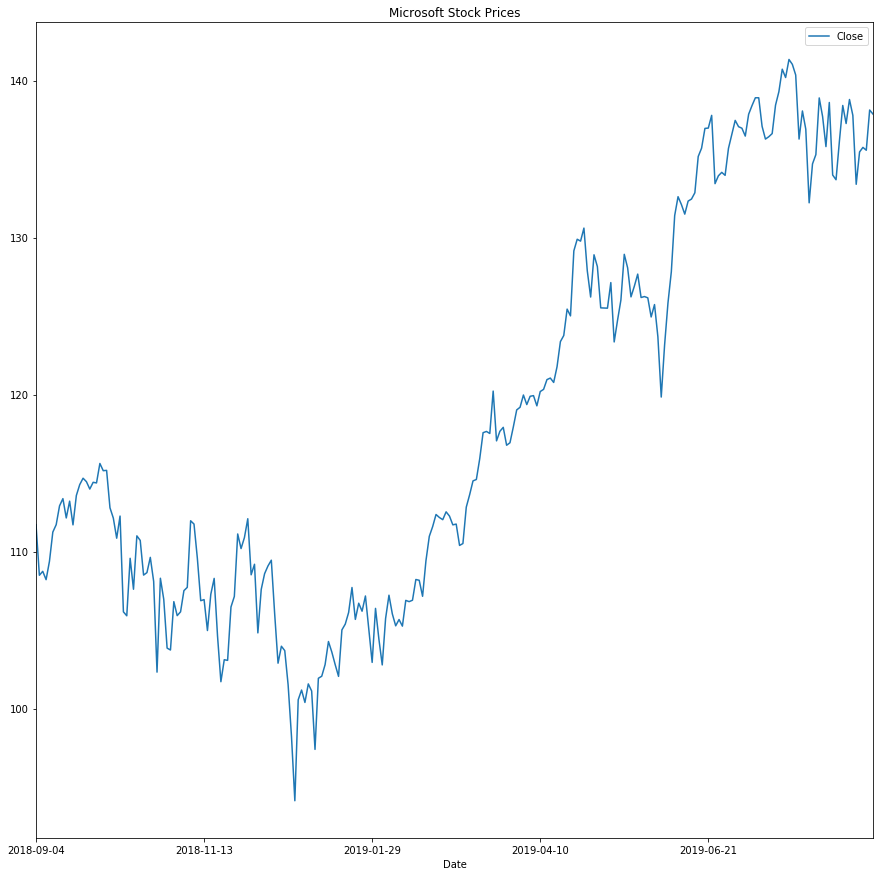

In [38]:
df.plot(x='Date', y='Close', title='Microsoft Stock Prices', figsize=(15,15))

In [39]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['L_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg

,Adj Close,Volume,L_PCT,PCT_change
0,109.981766,22634600,1.557603,0.775824
1,106.811584,32872400,3.060190,-2.270069
2,107.057709,23477600,1.361041,0.452654
3,106.535919,22498600,1.376950,-0.018483
4,107.687813,20727900,1.170230,0.496142
...,...,...,...,...
245,135.449997,20312600,1.225547,0.340760
246,135.740005,23102100,1.517605,-0.476570
247,135.559998,17393300,1.630269,0.504147
248,138.119995,20168700,1.107731,0.633876


In [40]:
dfreg.fillna(value=-99999, inplace=True)

X = np.array(dfreg.drop(columns=['Adj Close']))
y = np.array(dfreg['Adj Close'])
X = preprocessing.scale(X)
dates = np.array(df['Date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)
dates_train, dates_test = dates[:247],dates[247:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape, dates_train.shape, dates_test.shape


((247, 3), (3, 3), (247,), (3,), (247,), (3,))

<Figure size 432x288 with 0 Axes>

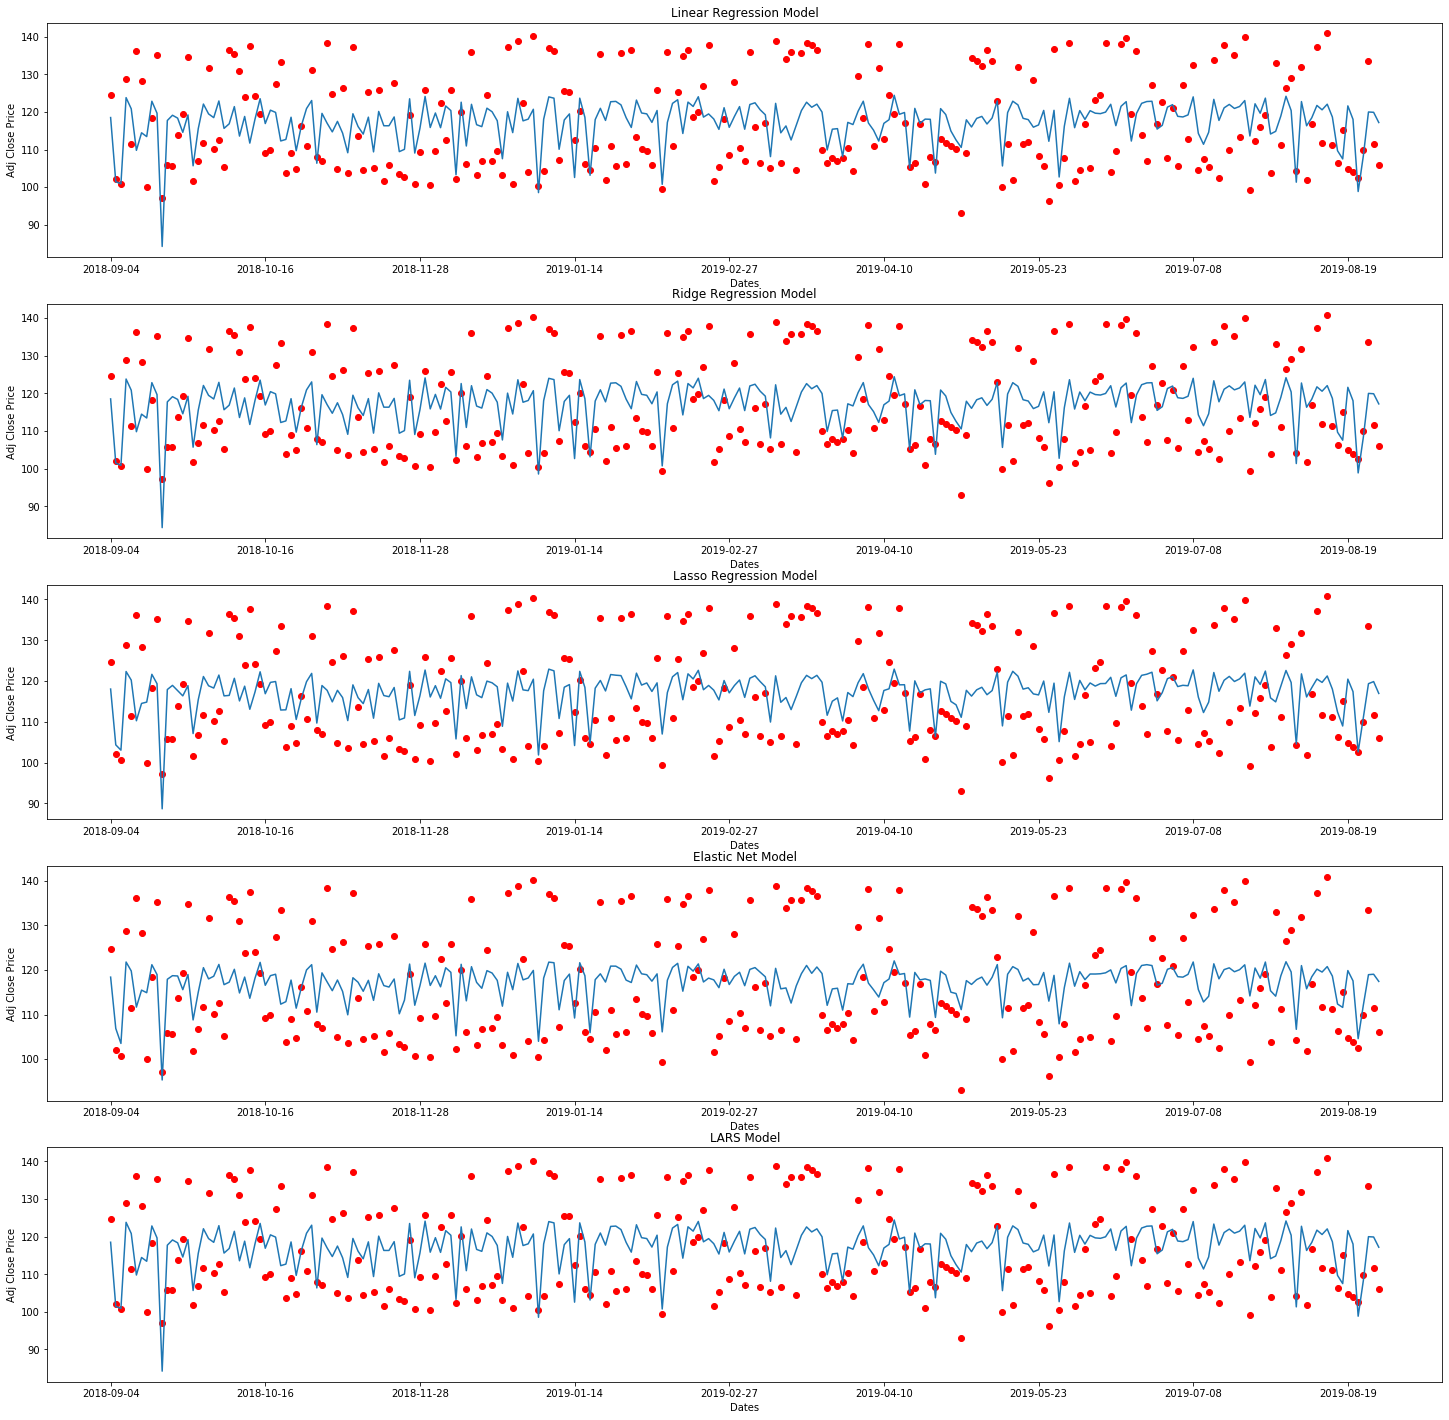

In [41]:
LinearRegressionModel = linear_model.LinearRegression()
RidgeRegressionModel = linear_model.Ridge()
LassoRegressionModel = linear_model.Lasso()
ElasticNetModel = linear_model.ElasticNet()
LarsModel = linear_model.Lars()
model_names = ['Linear Regression','Ridge Regression','Lasso Regression', 'Elastic Net','Lars Model']
models = [LinearRegressionModel, RidgeRegressionModel, LassoRegressionModel, ElasticNetModel, LarsModel]
LinearRegressionModel.fit(X_train, y_train)
RidgeRegressionModel.fit(X_train, y_train)
LassoRegressionModel.fit(X_train, y_train)
ElasticNetModel.fit(X_train, y_train)
LarsModel.fit(X_train, y_train)


#Drawing Hypothesis over the Training data

plt.subplots_adjust(hspace=0.9)
f = plt.figure(figsize=(25,25))

sp1 = plt.subplot(5,1,1)
plt.title('Linear Regression Model')
sp1.scatter(dates_train, y_train, color='r', label='Datapoints')
plt.ylabel('Adj Close Price')
plt.xlabel('Dates')
plt.xticks(np.arange(0, len(dates_train), step=30))
sp1.plot(dates_train, LinearRegressionModel.predict(X_train), label='Hypothesis/Predicted data')

plt.subplot(5,1,2)
plt.title('Ridge Regression Model')
plt.scatter(dates_train, y_train, color='r', label='Datapoints')
plt.ylabel('Adj Close Price')
plt.xlabel('Dates')
plt.xticks(np.arange(0, len(dates_train), step=30))
plt.plot(dates_train, RidgeRegressionModel.predict(X_train), label='Hypothesis/Predicted data')

plt.subplot(5,1,3)
plt.title('Lasso Regression Model')
plt.scatter(dates_train, y_train, color='r', label='Datapoints')
plt.ylabel('Adj Close Price')
plt.xlabel('Dates')
plt.xticks(np.arange(0, len(dates_train), step=30))
plt.plot(dates_train, LassoRegressionModel.predict(X_train), label='Hypothesis/Predicted data')

plt.subplot(5,1,4)
plt.title('Elastic Net Model')
plt.scatter(dates_train, y_train, color='r', label='Datapoints')
plt.ylabel('Adj Close Price')
plt.xlabel('Dates')
plt.xticks(np.arange(0, len(dates_train), step=30))
plt.plot(dates_train, ElasticNetModel.predict(X_train), label='Hypothesis/Predicted data')

plt.subplot(5,1,5)
plt.title('LARS Model')
plt.scatter(dates_train, y_train, color='r', label='Datapoints')
plt.ylabel('Adj Close Price')
plt.xlabel('Dates')
plt.xticks(np.arange(0, len(dates_train), step=30))
plt.plot(dates_train, LarsModel.predict(X_train), label='Hypothesis/Predicted data')

plt.show()

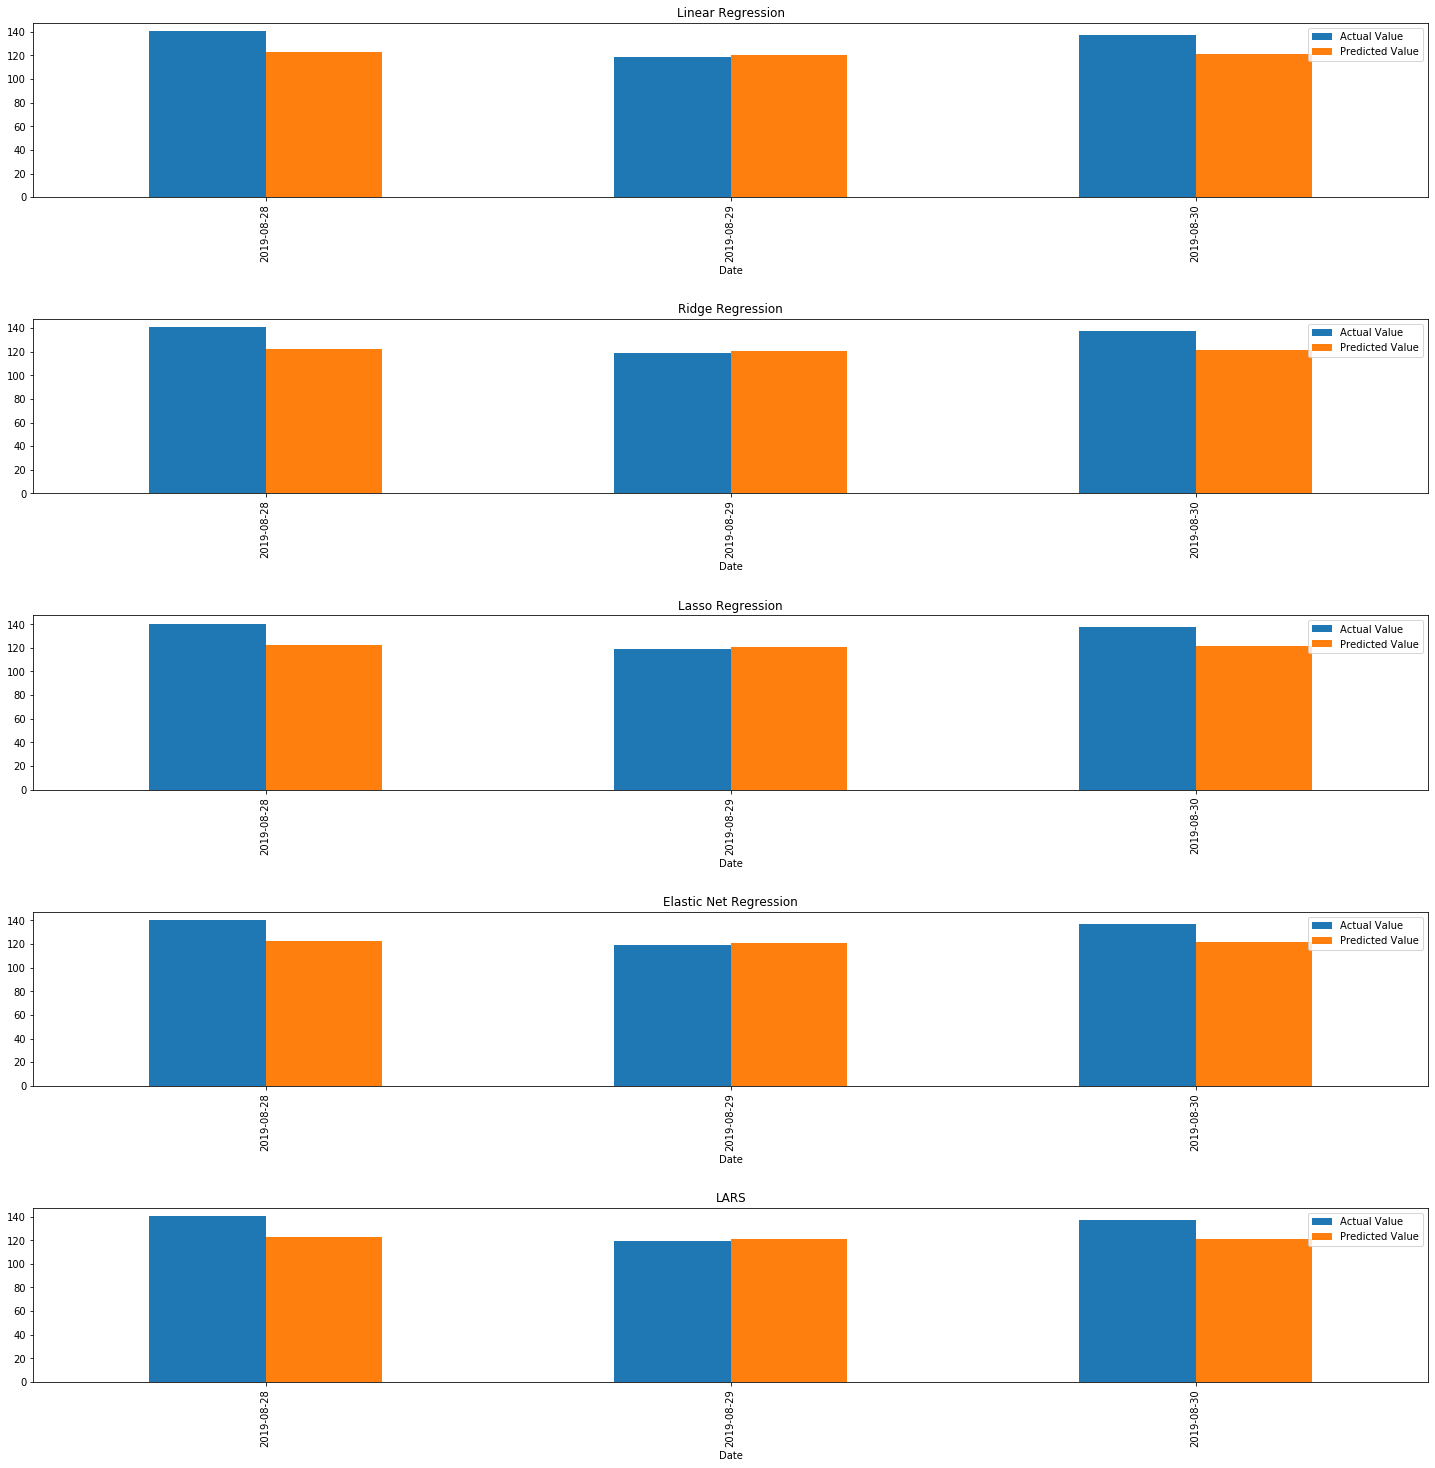

In [42]:
#Comparing actual values to the predicted values
LinRegDataFrame = pd.DataFrame()
LinRegDataFrame['Date'] = dates_test
LinRegDataFrame['Actual Value'] = y_test
LinRegDataFrame['Predicted Value'] = LinearRegressionModel.predict(X_test)

RidgeRegDataFrame = pd.DataFrame()
RidgeRegDataFrame['Date'] = dates_test
RidgeRegDataFrame['Actual Value'] = y_test
RidgeRegDataFrame['Predicted Value'] = RidgeRegressionModel.predict(X_test)

LassoRegDataFrame = pd.DataFrame()
LassoRegDataFrame['Date'] = dates_test
LassoRegDataFrame['Actual Value'] = y_test
LassoRegDataFrame['Predicted Value'] = LinearRegressionModel.predict(X_test)

ElasticNetRegDataFrame = pd.DataFrame()
ElasticNetRegDataFrame['Date'] = dates_test
ElasticNetRegDataFrame['Actual Value'] = y_test
ElasticNetRegDataFrame['Predicted Value'] = LinearRegressionModel.predict(X_test)

LarsRegDataFrame = pd.DataFrame()
LarsRegDataFrame['Date'] = dates_test
LarsRegDataFrame['Actual Value'] = y_test
LarsRegDataFrame['Predicted Value'] = LinearRegressionModel.predict(X_test)


f = plt.figure(figsize=(25,25))
plt.subplots_adjust(hspace=0.7)
sp1 = f.add_subplot(511, title='Linear Regression')
LinRegDataFrame.plot(x='Date', y=['Actual Value', 'Predicted Value'], kind='bar', ax=sp1)

sp2 = f.add_subplot(512, title='Ridge Regression')
RidgeRegDataFrame.plot(x='Date', y=['Actual Value', 'Predicted Value'], kind='bar', ax=sp2)

sp3 = f.add_subplot(513, title='Lasso Regression')
LassoRegDataFrame.plot(x='Date', y=['Actual Value', 'Predicted Value'], kind='bar', ax=sp3)

sp4 = f.add_subplot(514, title='Elastic Net Regression')
ElasticNetRegDataFrame.plot(x='Date', y=['Actual Value', 'Predicted Value'], kind='bar', ax=sp4)

sp5 = f.add_subplot(515, title='LARS')
LarsRegDataFrame.plot(x='Date', y=['Actual Value', 'Predicted Value'], kind='bar', ax=sp5)

plt.show()





In [43]:
scores = []
for i in range(5):
    scores.append(models[i].score(X_train, y_train))
    
scoresDataFrame = pd.DataFrame()
scoresDataFrame['Name'] = model_names
scoresDataFrame['Score'] = scores
scoresDataFrame

,Name,Score
0,Linear Regression,0.200565
1,Ridge Regression,0.200562
2,Lasso Regression,0.191944
3,Elastic Net,0.178836
4,Lars Model,0.200565


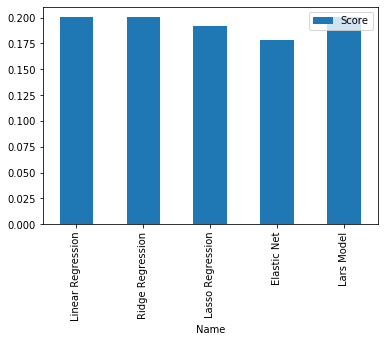

In [44]:
scoresDataFrame.plot(x='Name', y='Score', kind='bar')